In [1]:
#Fro Importing data from kaggle 
#Install the Kaggle first 
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"purushottamgupta","key":"dbaa764b15959296b10e816f5c6905ce"}'}

In [3]:
#Now we rae going to craete kaggle directory
!mkdir ~/.kaggle

In [4]:
# Now se will copy the json file to folder that we have created
! cp kaggle.json ~/.kaggle/

In [5]:
#Now we need permision to get json file act
! chmod 600 ~/.kaggle4/kaggle.json


chmod: cannot access '/root/.kaggle4/kaggle.json': No such file or directory


In [6]:
##Kaggle API Command for getting Data directly from Kaggle
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 221M/225M [00:02<00:00, 103MB/s] 
100% 225M/225M [00:02<00:00, 99.5MB/s]


In [7]:
import zipfile
! unzip flowers-recognition.zip 

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [8]:
import os
for dirpath, dirnames, filenames in os.walk("/content/flowers"):  
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 5 directories and 0 images in '/content/flowers'.
There are 0 directories and 733 images in '/content/flowers/sunflower'.
There are 0 directories and 784 images in '/content/flowers/rose'.
There are 0 directories and 764 images in '/content/flowers/daisy'.
There are 0 directories and 1052 images in '/content/flowers/dandelion'.
There are 0 directories and 984 images in '/content/flowers/tulip'.


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
import matplotlib.image as mpimg
import random

In [11]:
folder_dir = '/content/flowers'

In [12]:
#Now lets Visual of data 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_image(target_dir, target_class):
   target_folder = target_dir +  target_class #outpu: seg_train/seg_train/forest
   random_image = random.sample(os.listdir(target_folder),1)
   read_image = mpimg.imread(target_folder+"/" + random_image[0])
   
   plt.imshow(read_image),print(target_class)
   print(f"Image shape: {read_image.shape}") # show the shape of the image
 #  print(target_folder)
 #  print(random_image)

   return read_image

daisy
Image shape: (291, 500, 3)
sunflower
Image shape: (180, 240, 3)
rose
Image shape: (338, 500, 3)
tulip
Image shape: (240, 216, 3)
dandelion
Image shape: (240, 159, 3)


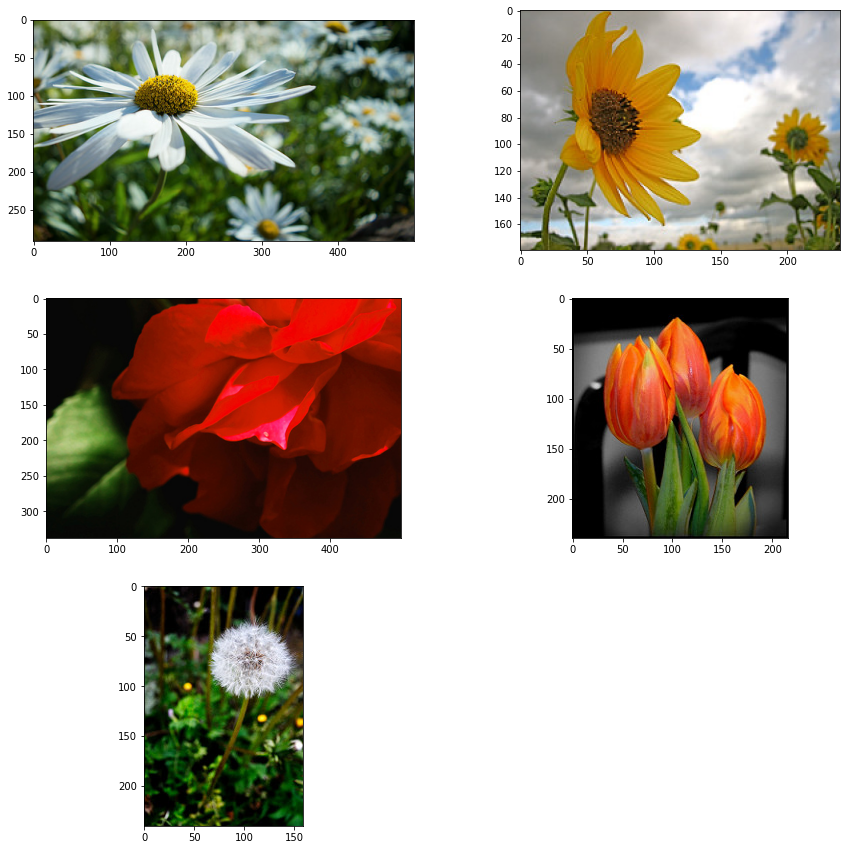

In [13]:
plt.figure(figsize=(15, 15))

plt.subplot(3,2,1)
building = show_image("/content/flowers/", "daisy")

plt.subplot(3,2,2)
building = show_image("/content/flowers/", "sunflower")

plt.subplot(3,2,3)
building = show_image("/content/flowers/", "rose")

plt.subplot(3,2,4)
building = show_image("/content/flowers/", "tulip")

plt.subplot(3,2,5)
building = show_image("/content/flowers/", "dandelion")


In [14]:
import cv2
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [15]:
data = []
label = []

SIZE = 224 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):

            label.append(folder)
            
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [17]:
data_arr = np.array(data)
label_arr = np.array(label)

In [18]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(label_arr)
y = to_categorical(y1,5)
X = data_arr/255

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator()
test_data = ImageDataGenerator()

targe_size = (224,224)
batch_size = 128

print("training images:")
train_data_gen = train_data.flow(X_train,y_train,
                                 batch_size = batch_size
                                )
print("Testing images:")
test_data_gen =  test_data.flow(X_test,y_test,
                                batch_size = batch_size
                                 )

training images:
Testing images:


In [ ]:
train_data_gen[0]

In [23]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [24]:
def create_model(model_url, num_classes):
  
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, #freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape= (224,224,3))# define the input image shape
#create our model

  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
    ])

  return model

In [25]:
model_resnet = create_model(resnet_url, num_classes=5)

model_resnet.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"]
                     )

In [26]:
resnet_history = model_resnet.fit(train_data_gen, epochs = 5,
                           steps_per_epoch = len(train_data_gen),
                           validation_data = test_data_gen,
                           validation_steps = len(test_data_gen) # save experiment logs here
                           ) # name of log files)

Epoch 1/5
31/31 [==============================] - 27s 241ms/step - loss: 1.0232 - accuracy: 0.6059 - val_loss: 0.5955 - val_accuracy: 0.7824
Epoch 2/5
31/31 [==============================] - 6s 192ms/step - loss: 0.4655 - accuracy: 0.8368 - val_loss: 0.4824 - val_accuracy: 0.8426
Epoch 3/5
31/31 [==============================] - 6s 192ms/step - loss: 0.3585 - accuracy: 0.8790 - val_loss: 0.4392 - val_accuracy: 0.8681
Epoch 4/5
31/31 [==============================] - 6s 193ms/step - loss: 0.3061 - accuracy: 0.9032 - val_loss: 0.4176 - val_accuracy: 0.8727
Epoch 5/5
31/31 [==============================] - 6s 192ms/step - loss: 0.2648 - accuracy: 0.9228 - val_loss: 0.4039 - val_accuracy: 0.8750


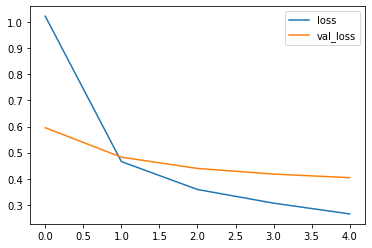

In [27]:
pd.DataFrame(resnet_history.history)[['loss','val_loss']].plot()

In [28]:
model_resnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 5)                 10245     
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [29]:
efficientnet_model = create_model(efficientnet_url, 5)

efficientnet_model.compile(loss = tf.keras.losses.categorical_crossentropy,
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

In [30]:
effici_history =  efficientnet_model.fit(train_data_gen, steps_per_epoch=len(train_data_gen),
                                         epochs = 5,validation_data = test_data_gen,
                                         validation_steps = len(test_data_gen) 
                                         ) # name of log files)

Epoch 1/5
31/31 [==============================] - 15s 187ms/step - loss: 1.0399 - accuracy: 0.6371 - val_loss: 0.6393 - val_accuracy: 0.8287
Epoch 2/5
31/31 [==============================] - 4s 139ms/step - loss: 0.5026 - accuracy: 0.8597 - val_loss: 0.4418 - val_accuracy: 0.9051
Epoch 3/5
31/31 [==============================] - 4s 142ms/step - loss: 0.3786 - accuracy: 0.8983 - val_loss: 0.3630 - val_accuracy: 0.9190
Epoch 4/5
31/31 [==============================] - 4s 140ms/step - loss: 0.3190 - accuracy: 0.9133 - val_loss: 0.3237 - val_accuracy: 0.9236
Epoch 5/5
31/31 [==============================] - 4s 141ms/step - loss: 0.2812 - accuracy: 0.9220 - val_loss: 0.2987 - val_accuracy: 0.9329


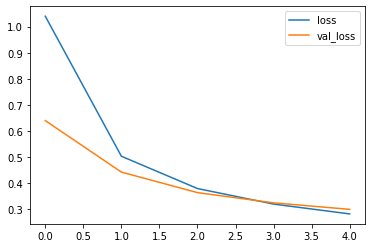

In [31]:
pd.DataFrame(effici_history.history)[['loss','val_loss']].plot()

In [58]:
from sklearn.metrics import f1_score
predictions = tf.round(efficientnet_model.predict(X_test))

In [55]:
tf.round(efficientnet_model.predict(X_test))

<tf.Tensor: shape=(432, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [59]:
f1_score = f1_score(y_test, predictions, average=None)
print(f1_score)

[0.93150685 0.96938776 0.89440994 0.91719745 0.89017341]


In [62]:
#label_arr = np.array(label)
label_list = ["sunflower", "rose","daisy","dandelion","tulip"]
df_f1_score = pd.DataFrame([label_list, f1_score])
df_f1_score

0         1        2          3         4
0  sunflower      rose    daisy  dandelion     tulip
1   0.931507  0.969388  0.89441   0.917197  0.890173

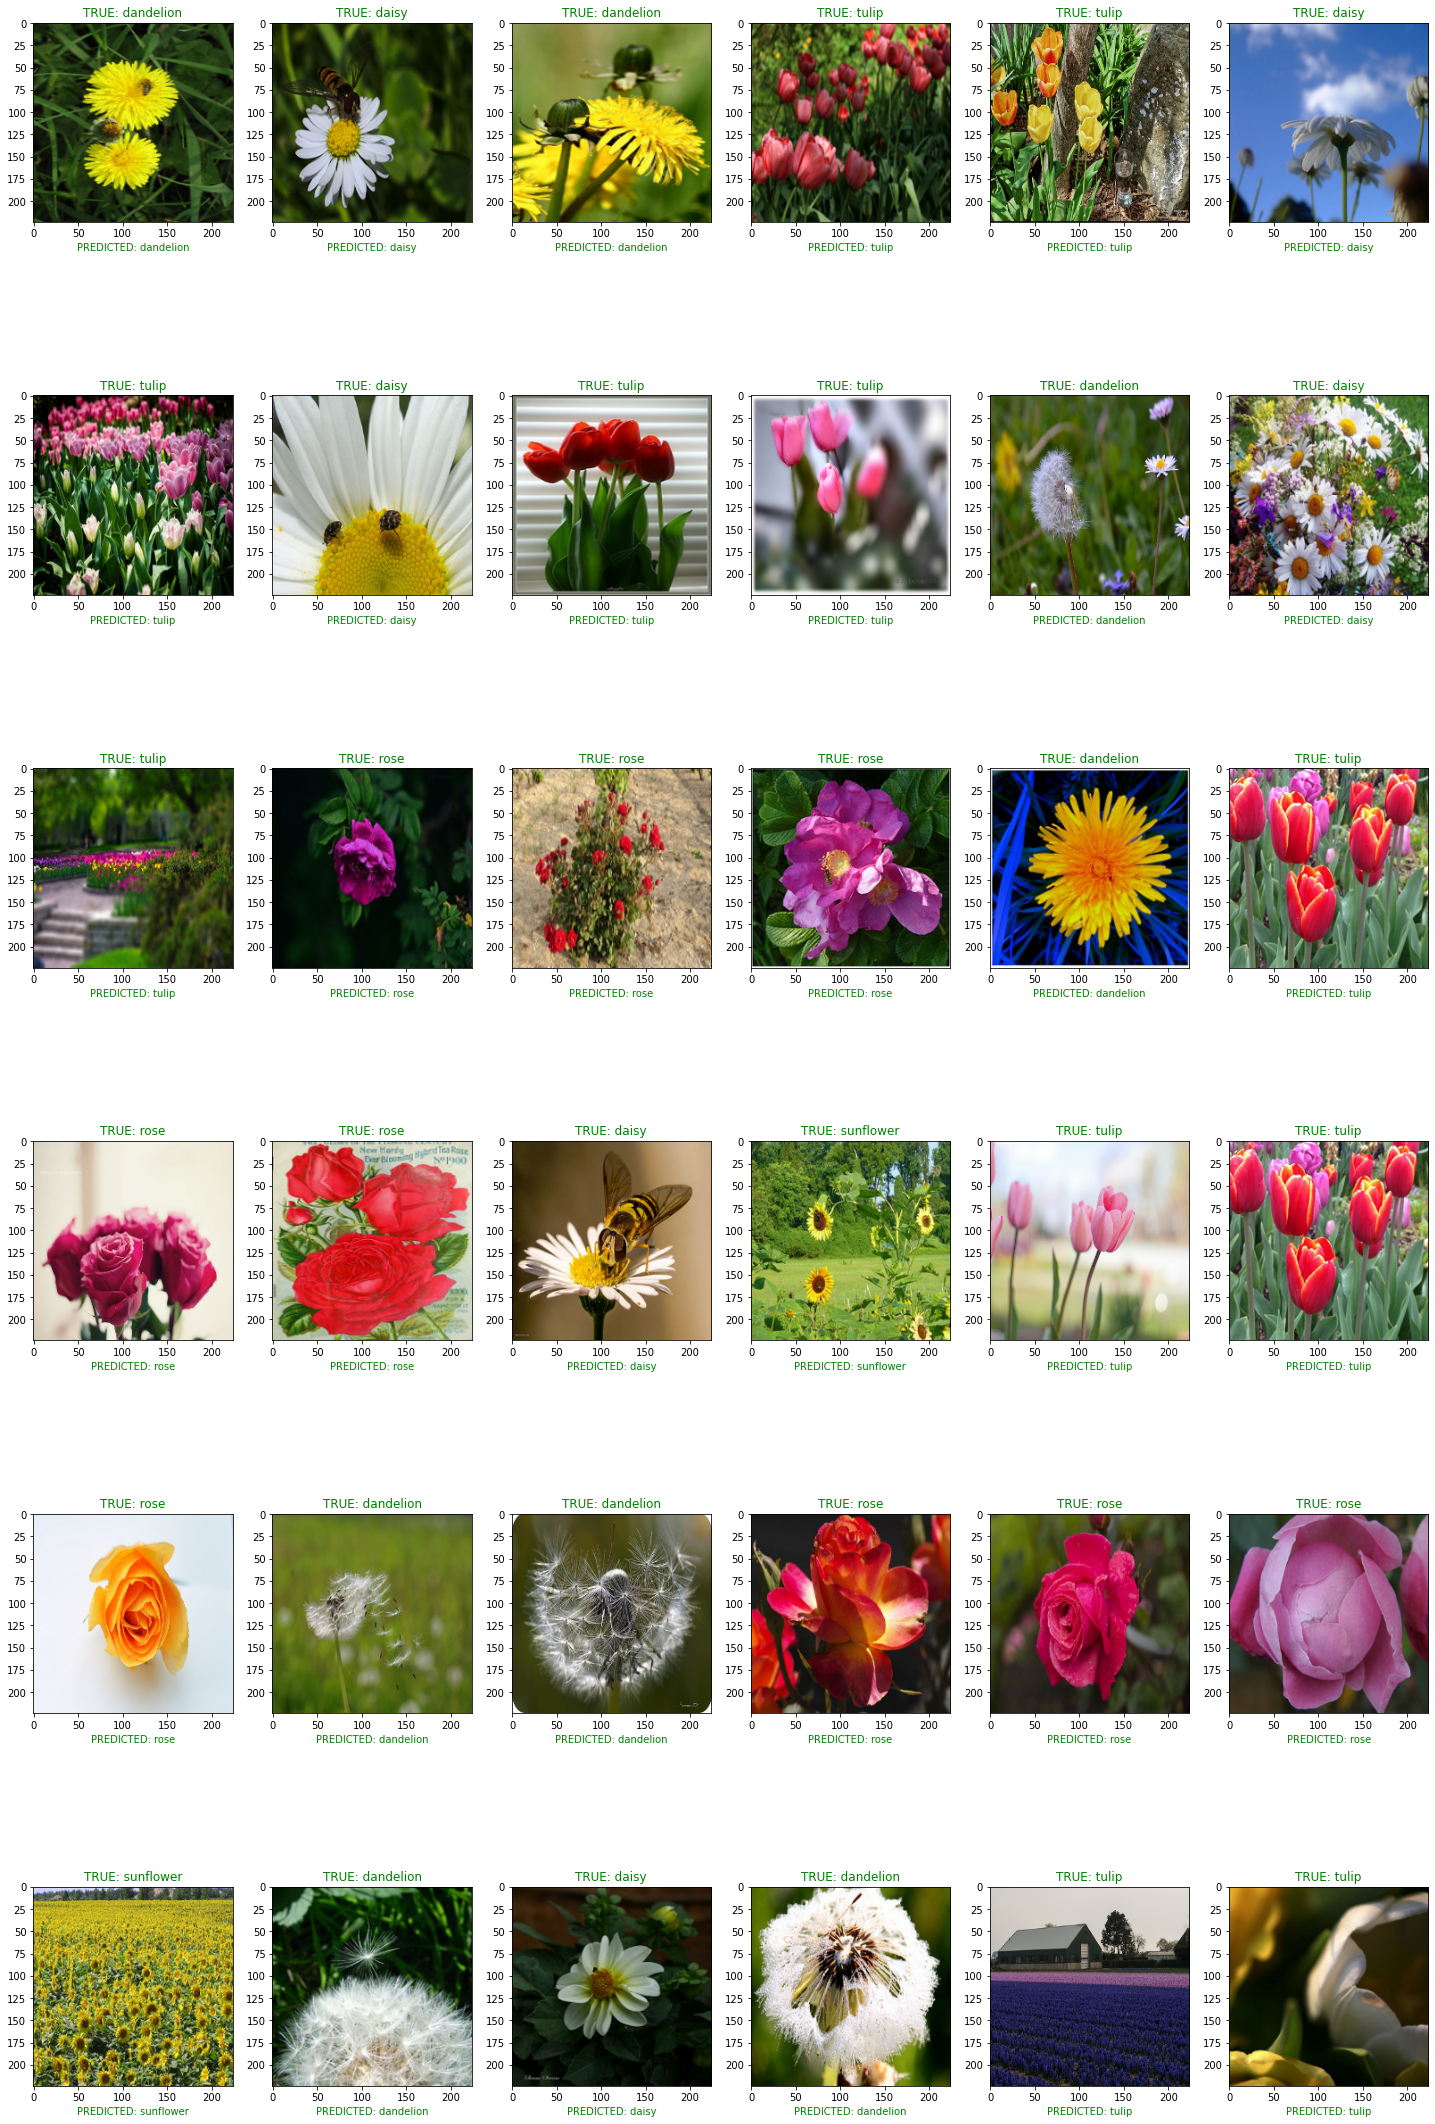

In [37]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(efficientnet_model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(efficientnet_model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(efficientnet_model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')